## Génération de figures pour le chapitre « Apprentissage supervisé ».

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rc('font', **{'family':'sans', 'size': 20})

matplotlib.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': [r'\usepackage{mathptmx}',r'\usepackage{amsmath}', r'\usepackage{amssymb}',]})

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color']

In [14]:
import scipy.stats as st

## Simple classification problem

In [4]:
X = np.random.uniform(low=-1.0, high=1.0, size=(250, 2))

In [5]:
pos = np.where(3*X[:, 0]**2 + X[:, 1]**2 < 0.5)[0]
neg = np.where(3*X[:, 0]**2 + X[:, 1]**2 >= 0.75)[0]

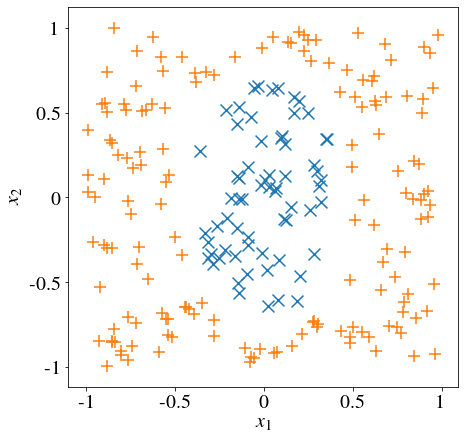

In [7]:
fig = plt.figure(figsize=(7, 7))
#plt.axis('off')
plt.scatter(X[pos, 0], X[pos, 1], marker='x', s=142)
plt.scatter(X[neg, 0], X[neg, 1], marker='+', s=142)

t=plt.xticks([-1, -0.5, 0, 0.5, 1.], ["-1", "-0.5", "0", "0.5", "1"])
t=plt.yticks([-1, -0.5, 0, 0.5, 1.], ["-1", "-0.5", "0", "0.5", "1"])

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

#t=plt.xlim([-4.2, 4.2])

plt.savefig('../poly/figures/erm/simple_classif.pdf', bbox_inches='tight')

## Multiple solutions to linear classifier

In [8]:
X = np.loadtxt('linearly_separable_X.csv')
y = np.loadtxt('linearly_separable_y.csv')

# remove 11 and 25, which are too close to the hyperplane
X = np.delete(X, 25, axis=0)
X = np.delete(X, 11, axis=0)
y = np.delete(y, 25)
y = np.delete(y, 11)

pos = [i for i in range(X.shape[0]) if y[i] > 0]
neg = [i for i in range(X.shape[0]) if i not in pos]

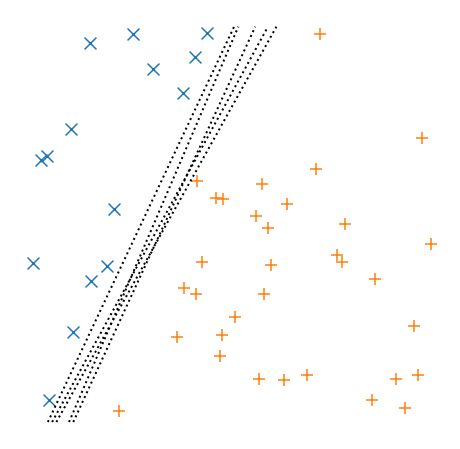

In [9]:
fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(X[pos, 0], X[pos, 1], marker='x', s=142)
plt.scatter(X[neg, 0], X[neg, 1], marker='+', s=142)
#plt.plot([0.1, 0.5], [0, 1], ":", lw=2, color='k') 
plt.plot([0.11, 0.51], [0, 1], ":", lw=2, color='k') 
plt.plot([0.12, 0.55], [0, 1], ":", lw=2, color='k') 
plt.plot([0.08, 0.6], [0, 1], ':', lw=2, color='k')
plt.plot([0.06, 0.5], [0, 1], ':', lw=2, color='k')
plt.plot([0.07, 0.58], [0, 1], ':', lw=2, color='k')

plt.savefig('../poly/figures/erm/multiple_solutions.pdf', bbox_inches='tight')

## Linear regression

In [37]:
X = np.random.random(size=(50, ))
w = np.random.random()
eps = (np.random.random(size=(50, ))-0.5)*0.3

In [38]:
y = np.dot(X, w) + eps

In [39]:
f1 = X[1]*w 

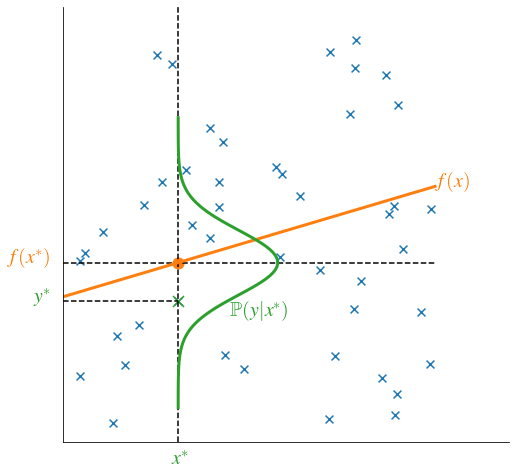

In [63]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

plt.plot([X[1], X[1]], [-0.1, 0.7], color='k', ls='--')
plt.plot([0, 1], [f1, f1], color='k', ls='--')
plt.plot([0, X[1]], [y[1], y[1]], color='k', ls='--')
plt.scatter(X, y, marker='x', s=62)
plt.scatter(X[1], y[1], marker='x', s=122, color=def_colors[2])
plt.scatter(X[1], f1, marker='o', s=122, color=def_colors[1])
plt.plot([0, 1], [0, w], color=def_colors[1], ls='-', lw=3)

distr = st.multivariate_normal(mean=f1, cov=0.0005)
yvals = np.linspace(f1 - 0.1, f1 + 0.1, 100)
xvals = distr.pdf(yvals) * 0.015 + X[1]
plt.plot(xvals, yvals, color=def_colors[2], lw=3)

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xticks([], [])
plt.yticks([], [])

plt.text(X[1]-0.02, -0.115, r'$x^*$', color=def_colors[2])
plt.text(-0.15, f1, r'$f(x^*)$', color=def_colors[1])
plt.text(-0.08, y[1], r'$y^*$', color=def_colors[2])
plt.text(1, w, r'$f(x)$', color=def_colors[1])
plt.text(X[1] + 0.14, y[1] - 0.01, r'$\mathbb{P}(y|x^*)$', color=def_colors[2])

plt.xlim([0, 1.2])
plt.ylim([-0.1, 0.2])

plt.savefig('../poly/figures/erm/linreg.pdf', bbox_inches='tight')